# HW 2

## Problem 1 15 points

Consider proof-of-work via finding birthday collisions(see http://www.hashcash.org/papers/momentum.pdf). 

1.Write probability of a matchand probability of matching fixed value for a set of N unique values as a function of the observation number  5 points

The probability of matching
$$
p(n)=1-\frac{d!}{d^n(d-n)!}
$$


if we want to know probability, that in group of people birthday of somebody is the same that birthday of somebody not from group is:
$$
q(n)=1-(\frac{d-1}{d})^n
$$

If we want to know probability, that in group of people birthday of somebody is the same that birthday of somebody from the same  group is:
$$
p(n,d)=1-e^\frac{-1(n(n-1))}{2d}
$$

2.Plot this functions for N = 10, 100, 1000, 10000 and explain the differences 5 points

Text(0.5,0,'number')

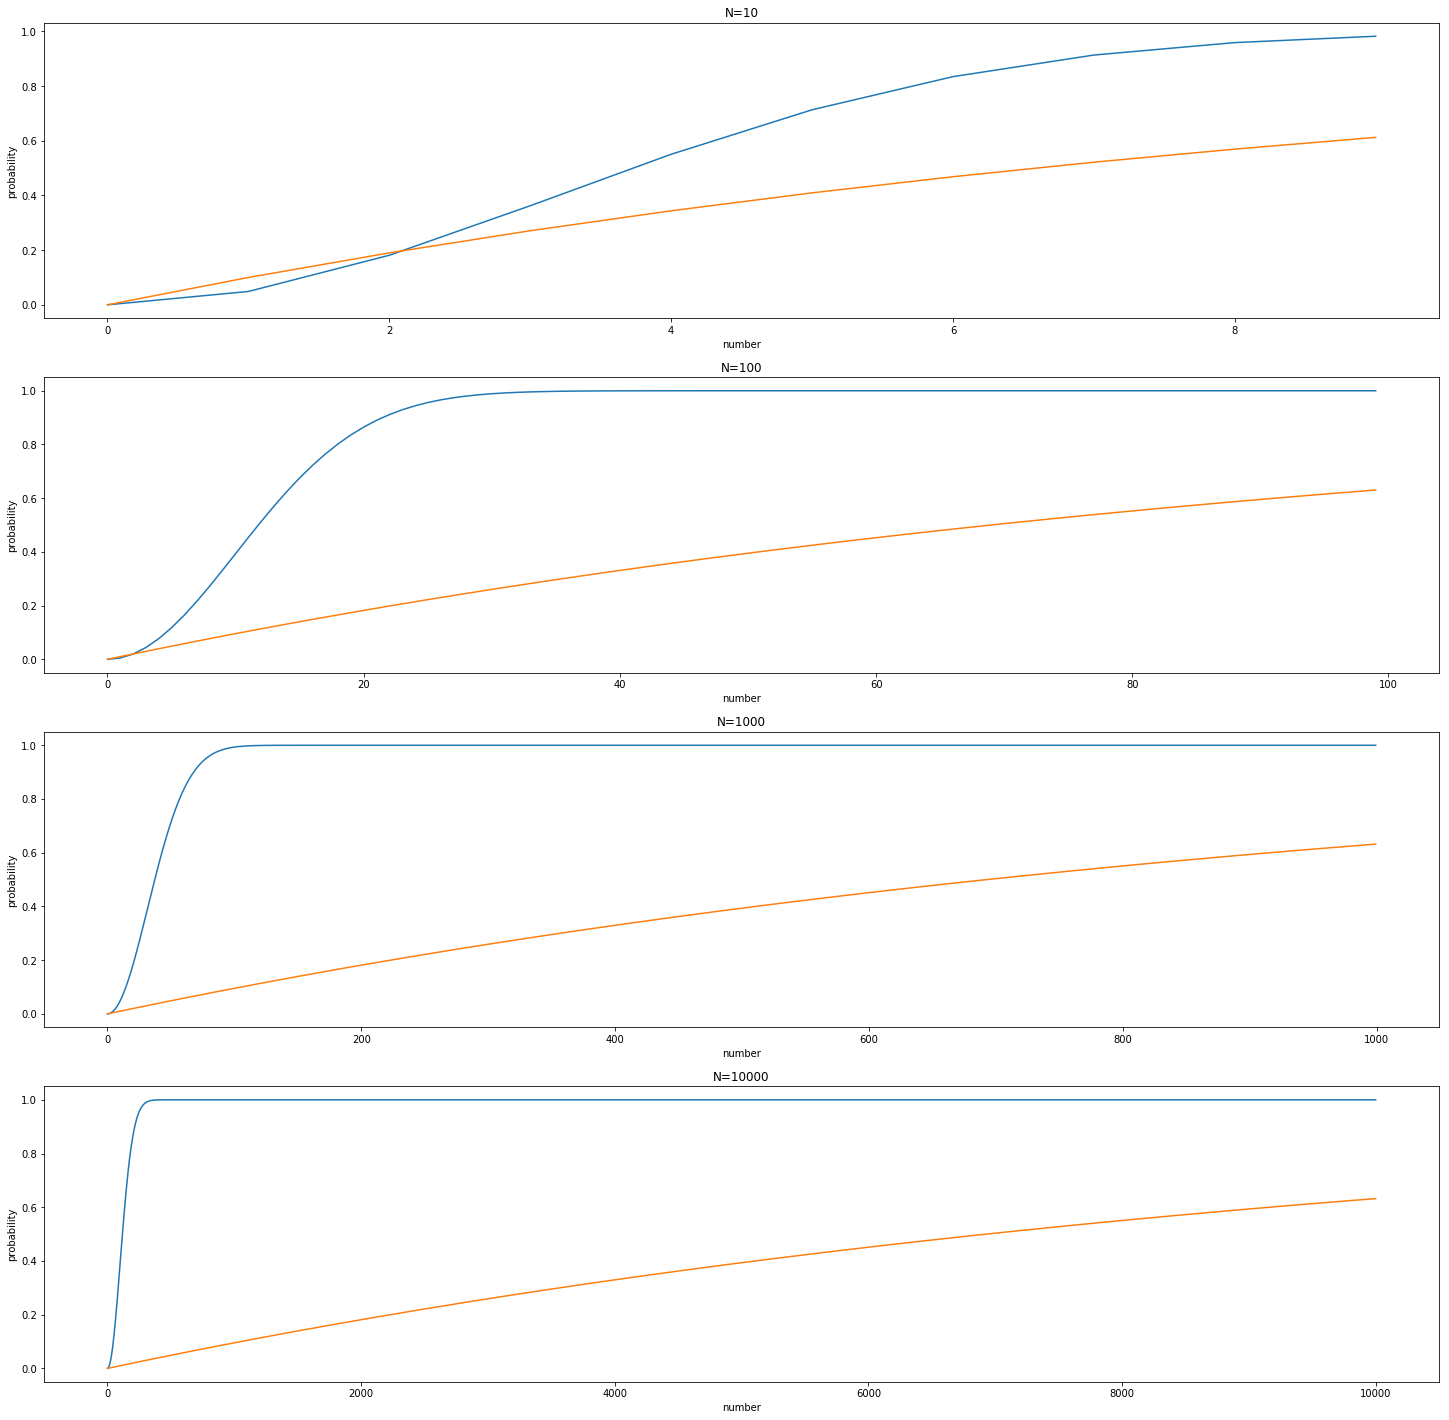

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
def p(N):
    return [1- math.exp((-i**2)/(2*N)) for i in range(N)]

def q(N):
    return [1-(((N-1))/N)**i for i in range(N)]
p(10)
q(10)

plt.figure(figsize=(25,25))
plt.subplot(411)
plt.title('N=10')
plt.plot(p(10))
plt.plot(q(10))
plt.ylabel("probability")
plt.xlabel("number")
plt.subplot(412)
plt.title('N=100')
plt.plot(p(100))
plt.plot(q(100))
plt.ylabel("probability")
plt.xlabel("number")
plt.subplot(413)
plt.title('N=1000')
plt.plot(p(1000))
plt.plot(q(1000))
plt.ylabel("probability")
plt.xlabel("number")
plt.subplot(414)
plt.title('N=10000')
plt.plot(p(10000))
plt.plot(q(10000))
plt.ylabel("probability")
plt.xlabel("number")


As we see in the graph, if then bigger N(quntaty of days), then less probability. for $N=100$, if $d=10$ then $p(n)=0.99$, for $n= 10000, p(n)=0.0099$

3.Propose the proof-of-work function with difficulty and CPU/memory parameters. 5 points

According from the article we can mafe proof of work function, from combinaton of 2 another:

-Cryptographically secure function $f$
-memory hard hashing function $g$

So, the algorithm of function is:

1) For fixed $G$ compute $H=f(G)$

2) We need to find $A,B$ such that $g(H+A)=g(H+B)$

3) no we can use condition $If$

if $f(A+B+H)<target$ do punkt 2

4)reurn $A,B$

So, it will be easy to verify , but very hard to find $A,B$ pair

## Problem 2 (20 points)

Elliptic curves play an important role in modern cryptography. In this problem you will become familiar with basic operations over them

1.Implement python function that makes an addition operation of two elliptic curve points. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve and coordinates of points. Please note that there are four possible cases depending on points mutual agreement (here we also mean adding of two similar points) 4 points

In [18]:
#We know that R=P+Q, P={x1,y1},Q={x2,y2}
def adition(a, b, n, x1, y1, x2, y2):
    #Lets check Diskriminant
    D=(-16*(4*(a**3)+27*(b**2)))%n
    if D<0:
        return 'D < 0'
    #algorithm from seminar
    def eea(a,b):
        if b==0:return (1,0)
        (q,r) = (a//b,a%b)
        (s,t) = eea(b,r)
        return (t, s-(q*t))
    def find_inverse(x,y):
        inv = eea(x,y)[0]
        if inv < 1: inv += y #we only want positive values
        return inv
    #Lets belong our points to curve or not
    if (y1**2) % n != (x1**3 + a*x1 + b) % n or (y2**2) % n != (x2**3 + a*x2 + b) % n:
        return 'it is not belongs to curve, try again'
    else:
        x3 = 0
        y3 = 0
        #a=-a
        if x1 != x2 and y1 != y2:
            s = ((y1 - y2) * find_inverse((x1 - x2)%n, n)) % n
            x3 = (s**2 - x1 - x2) % n
            y3 = (-y1 + s *( x1 - x3)) % n
            
            
        elif (x1 == x2 and y1 == y2) and (x1 != 0 and y1 != 0):
            s = ((3 * x1**2 + a) * find_inverse(2 * y1, n)%n) % n
            x3 = (s**2 - 2*x1) % n
            y3 = (-y1 + s * (x1 - x3)) % n
            
        elif x1 == x2 and y1 == -y2:
            x3 = 0
            y3 = 0
        elif (x1 == x2 and y1 == y2) and y1 == 0:
            x3 = 0
            y3 = 0
        return x3, y3

In [19]:
adition(7,24,50,27,14,24,46)

(35, 38)

2.Implement python function that makes a multiplication of elliptic curve point by a natural number. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve, coordinate of point and integer number. Please note that $aA$ is equal to $A+....+A$ a times 4 points

In [20]:
def mult(a, b, n, x1, y1, k):
        x_2 = x1
        y_2 = y1
        for i in range(k - 1):            
            x_2,y_2 = adition(a, b, n, x_2, y_2, x1, y1)[0], adition(a, b, n, x_2, y_2, x1, y1)[1]
           # x_2,y_2=x_3,y_3
        return x_2, y_2

In [21]:

a =5
b = 7
n = 97
x1, y1 = 2, 5
k = 2
mult(a, b, n, x1, y1, k)        


(60, 71)

3.Implement python function that produces the common secret key in elliptic curve version of the Diffie-Hellman protocol. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve, generator point of the group of points in this curve and Bob's and Alices' secret keys (natural numbers). Please note that in this problem we change $g^amod p$ operation by $aG$, there $a$ is secret key and $G$ is generator point. 4 points

In [22]:
def key(a,b,n,Gx,Gy,Alice,Bob):
    
    Alice_hx=mult(a, b, n,Gx, Gy, Alice)[0]
    Alice_hy=mult(a, b, n, Gx, Gy, Alice)[1]
    
    Bob_hx=mult(a, b, n, Gx, Gy, Bob)[0]
    
    Bob_hy=mult(a, b, n, Gx, Gy, Bob)[1]
    
    Bob_sx=mult(a, b, n, Alice_hx, Alice_hy, Bob)[0]
    Bob_sy=mult(a, b, n, Alice_hx, Alice_hy, Bob)[1]
    
    Alice_sx= mult(a, b, n, Bob_hx, Bob_hy, Alice)[0]
    Alice_sy=mult(a, b, n, Bob_hx, Bob_hy, Alice)[1]
    
    
    
    if Alice_sx==Bob_sx and Alice_sy==Bob_sy:
        return 'The common secret key ({},{})'.format(Alice_sx,Bob_sy)
    else:
        return 'Try again'
    

4.For a given point of elliptic curve in Wierstrass form ($y^2=x^3-px-q$) write a python function that make a list of all point in group generated by this point. 4 points

In [26]:
def points(a, b,p, Gx, Gy):
    points = []
    x = Gx
    y = Gy
    k = 1
    
    while x !=0 and y != 0:
        points.append((x, y))
        k += 1
        x= mult(a, b, p, Gx, Gy, k)[0], 
        y=mult(a, b, p, Gx, Gy, k)[1]
    return points
points(2,3,97,3,6)


[(3, 6), ((80,), 10), ((80,), 87), ((3,), 91)]

5.Test you functions over elliptic curve $y^2=x^3-3x-6$ over $\mathbf{F}_{17}$ with generator point $G=(15;3)$, Bob's secret key is 3 and Alice secret key is 2. In other words give the full list of points of this elliptic curve and provide a common secret key in the Diffie-Hellman protocol. 4 points

In [27]:
a = 2
b = 3
n = 97
Gx = 3
Gy = 6
bob = 3
alice = 2
print(points(a, b,n, Gx, Gy))
print(key(a, b, n, Gx, Gy, alice, bob))

[(3, 6), ((80,), 10), ((80,), 87), ((3,), 91)]
The common secret key (3,6)


## Problem 3 15 points

Consider the following employee relation, and the way salary should be partitioned.



<img src="pic1.png">

Consider the following query:

SELECT did, SUM(salary)

FROM EMPLOYEE

GROUP BY did.


Formulate in relational algebra form (5 points)

$$
 \prod{did,sum(salary)}\gamma did,sum(salary)^{(EMPLOYEE)}
$$

Formulate the SQL query to show all employee receiving salary in given range (5 points)

Formulate the SQL query to show city with maximal salary (5 points)